### Цель задания	

- Провести разведанализ: построить графики для данных, выделить основные закономерности и сделать выводы о распределении значений внутри переменных
- Построить основные графики, используемые при визуализации и собрать их в дашборд
- Найти выбросы в данных, используя метод трёх сигм и ящик с усами
- Построить уравнение регрессионного анализа на график

In [2]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

ny_housing = pd.read_csv("https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_01_visualization/data/NY-House-Dataset.csv")
ny_housing = ny_housing[ny_housing['PRICE'] <= 200000000]

#Просмотр данных
ny_housing.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [3]:
# Просмотр структуры данных
ny_housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4800 non-null   object 
 1   TYPE                         4800 non-null   object 
 2   PRICE                        4800 non-null   int64  
 3   BEDS                         4800 non-null   int64  
 4   BATH                         4800 non-null   float64
 5   PROPERTYSQFT                 4800 non-null   float64
 6   ADDRESS                      4800 non-null   object 
 7   STATE                        4800 non-null   object 
 8   MAIN_ADDRESS                 4800 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4800 non-null   object 
 10  LOCALITY                     4800 non-null   object 
 11  SUBLOCALITY                  4800 non-null   object 
 12  STREET_NAME                  4800 non-null   object 
 13  LONG_NAME              

Вывод из структуры данных - Пропуски данных отсутствуют

<Axes: >

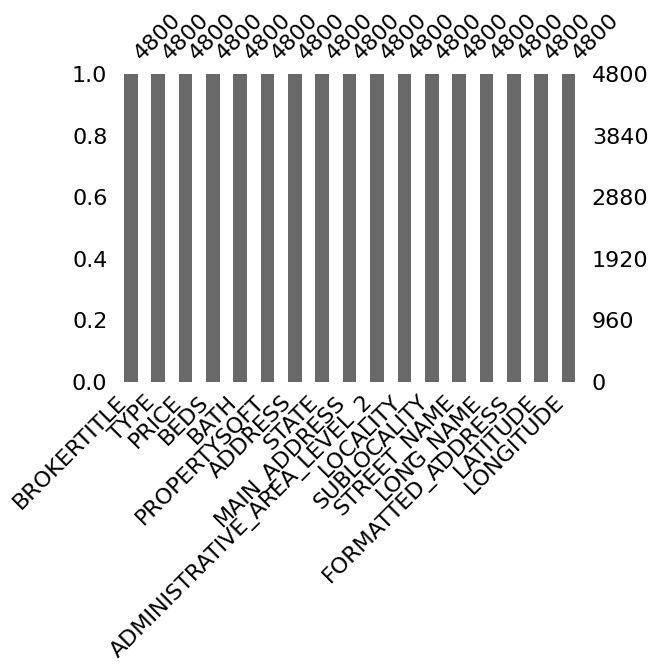

In [4]:
#Графическое представление отсутствия пропусков
msno.bar(ny_housing, figsize=(6,4))

### Поставленная задача

Задание 1.1 Построить разные графики и сделать 6 выводов


На этом этапе нам нужно выявить с помощью визуализаций разные паттерны и зависимости, распределение значений внутри переменных.
Создайте 6 визуализаций разных видов. Можно использовать графики из галерей Matplotlib или Seaborn. Полученные графики отобразите и сохраните в отдельные переменные.
Каждый график должен иметь все стандартные аттрибуты - подписи осей, название и другие необходимые детали.
NB: Визуализация должна иметь смысл и нести новую информацию.

### №1 Как зависит цена от площади

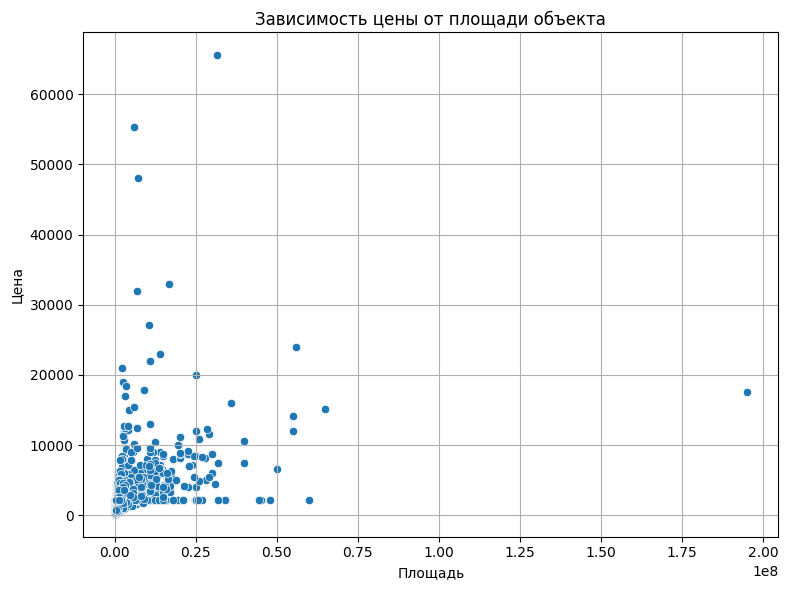

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PRICE', y='PROPERTYSQFT', data=ny_housing)
plt.title('Зависимость цены от площади объекта')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.grid(True)
plt.tight_layout()

### №2 Расположение объектов по районам города

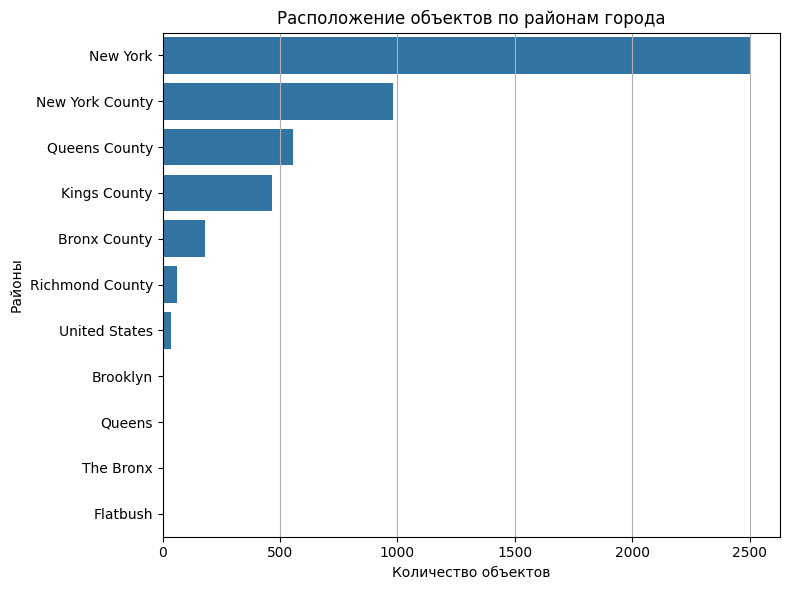

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(y='LOCALITY', data=ny_housing, order = ny_housing['LOCALITY'].value_counts().index)
plt.title('Расположение объектов по районам города')
plt.xlabel('Количество объектов')
plt.ylabel('Районы')
plt.grid(axis='x')
plt.tight_layout()

### №3 Цены на объекты недвижимости

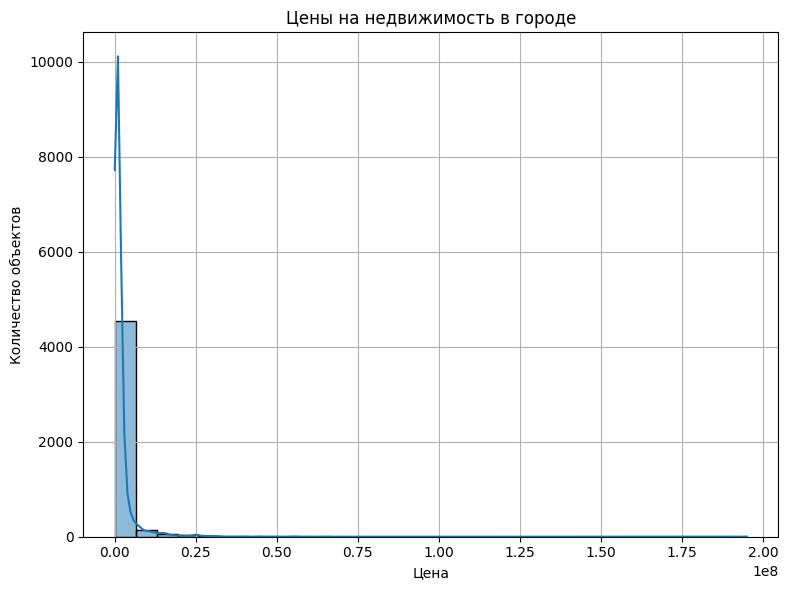

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(ny_housing['PRICE'], bins=30, kde=True)
plt.title('Цены на недвижимость в городе')
plt.xlabel('Цена')
plt.ylabel('Количество объектов')
plt.grid(True)
plt.tight_layout()

### №4 Зависимость цен от количества комнат

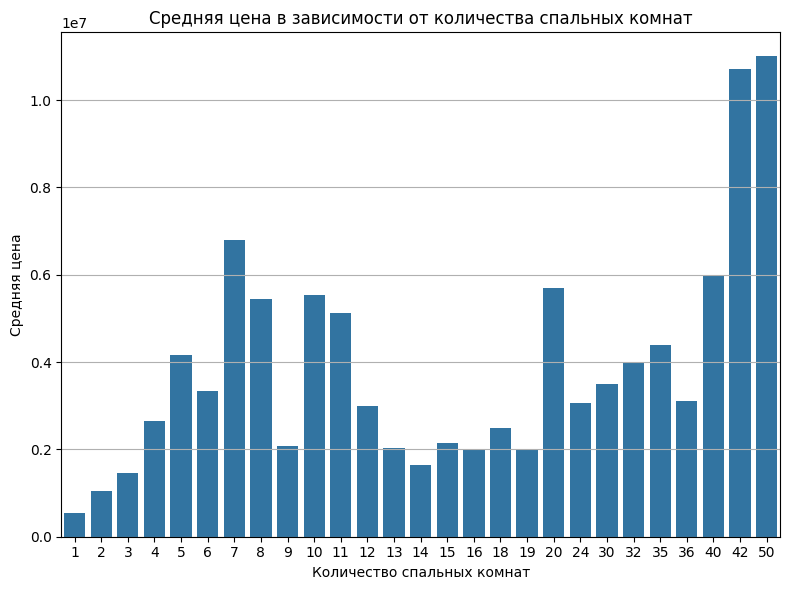

In [8]:
plt.figure(figsize=(8, 6))
price_by_beds = ny_housing.groupby('BEDS')['PRICE'].mean().reset_index()
sns.barplot(x='BEDS', y='PRICE', data=price_by_beds)
plt.title('Средняя цена в зависимости от количества cпальных комнат')
plt.ylabel('Средняя цена')
plt.xlabel('Количество спальных комнат')
plt.grid(axis='y')
plt.tight_layout()

### №5 Распределение количества ванных комнат

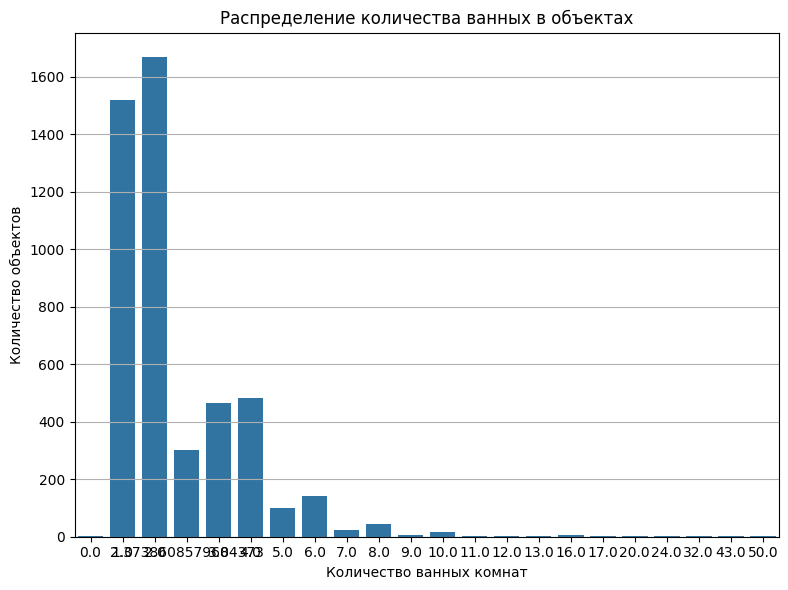

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='BATH', data=ny_housing)
plt.title('Распределение количества ванных в объектах')
plt.xlabel('Количество ванных комнат')
plt.ylabel('Количество объектов')
plt.grid(axis='y')
plt.tight_layout()

### №6 Распределение продаж по типам и объектам недвижимости

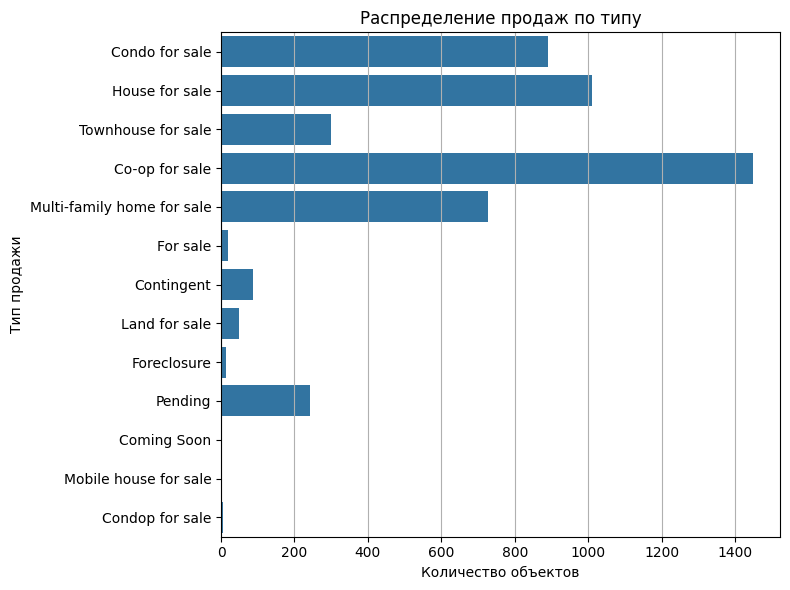

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(y='TYPE', data=ny_housing)
plt.title('Распределение продаж по типу')
plt.ylabel('Тип продажи')
plt.xlabel('Количество объектов')
plt.grid(axis='x')
plt.tight_layout()

### Дашборд графиков

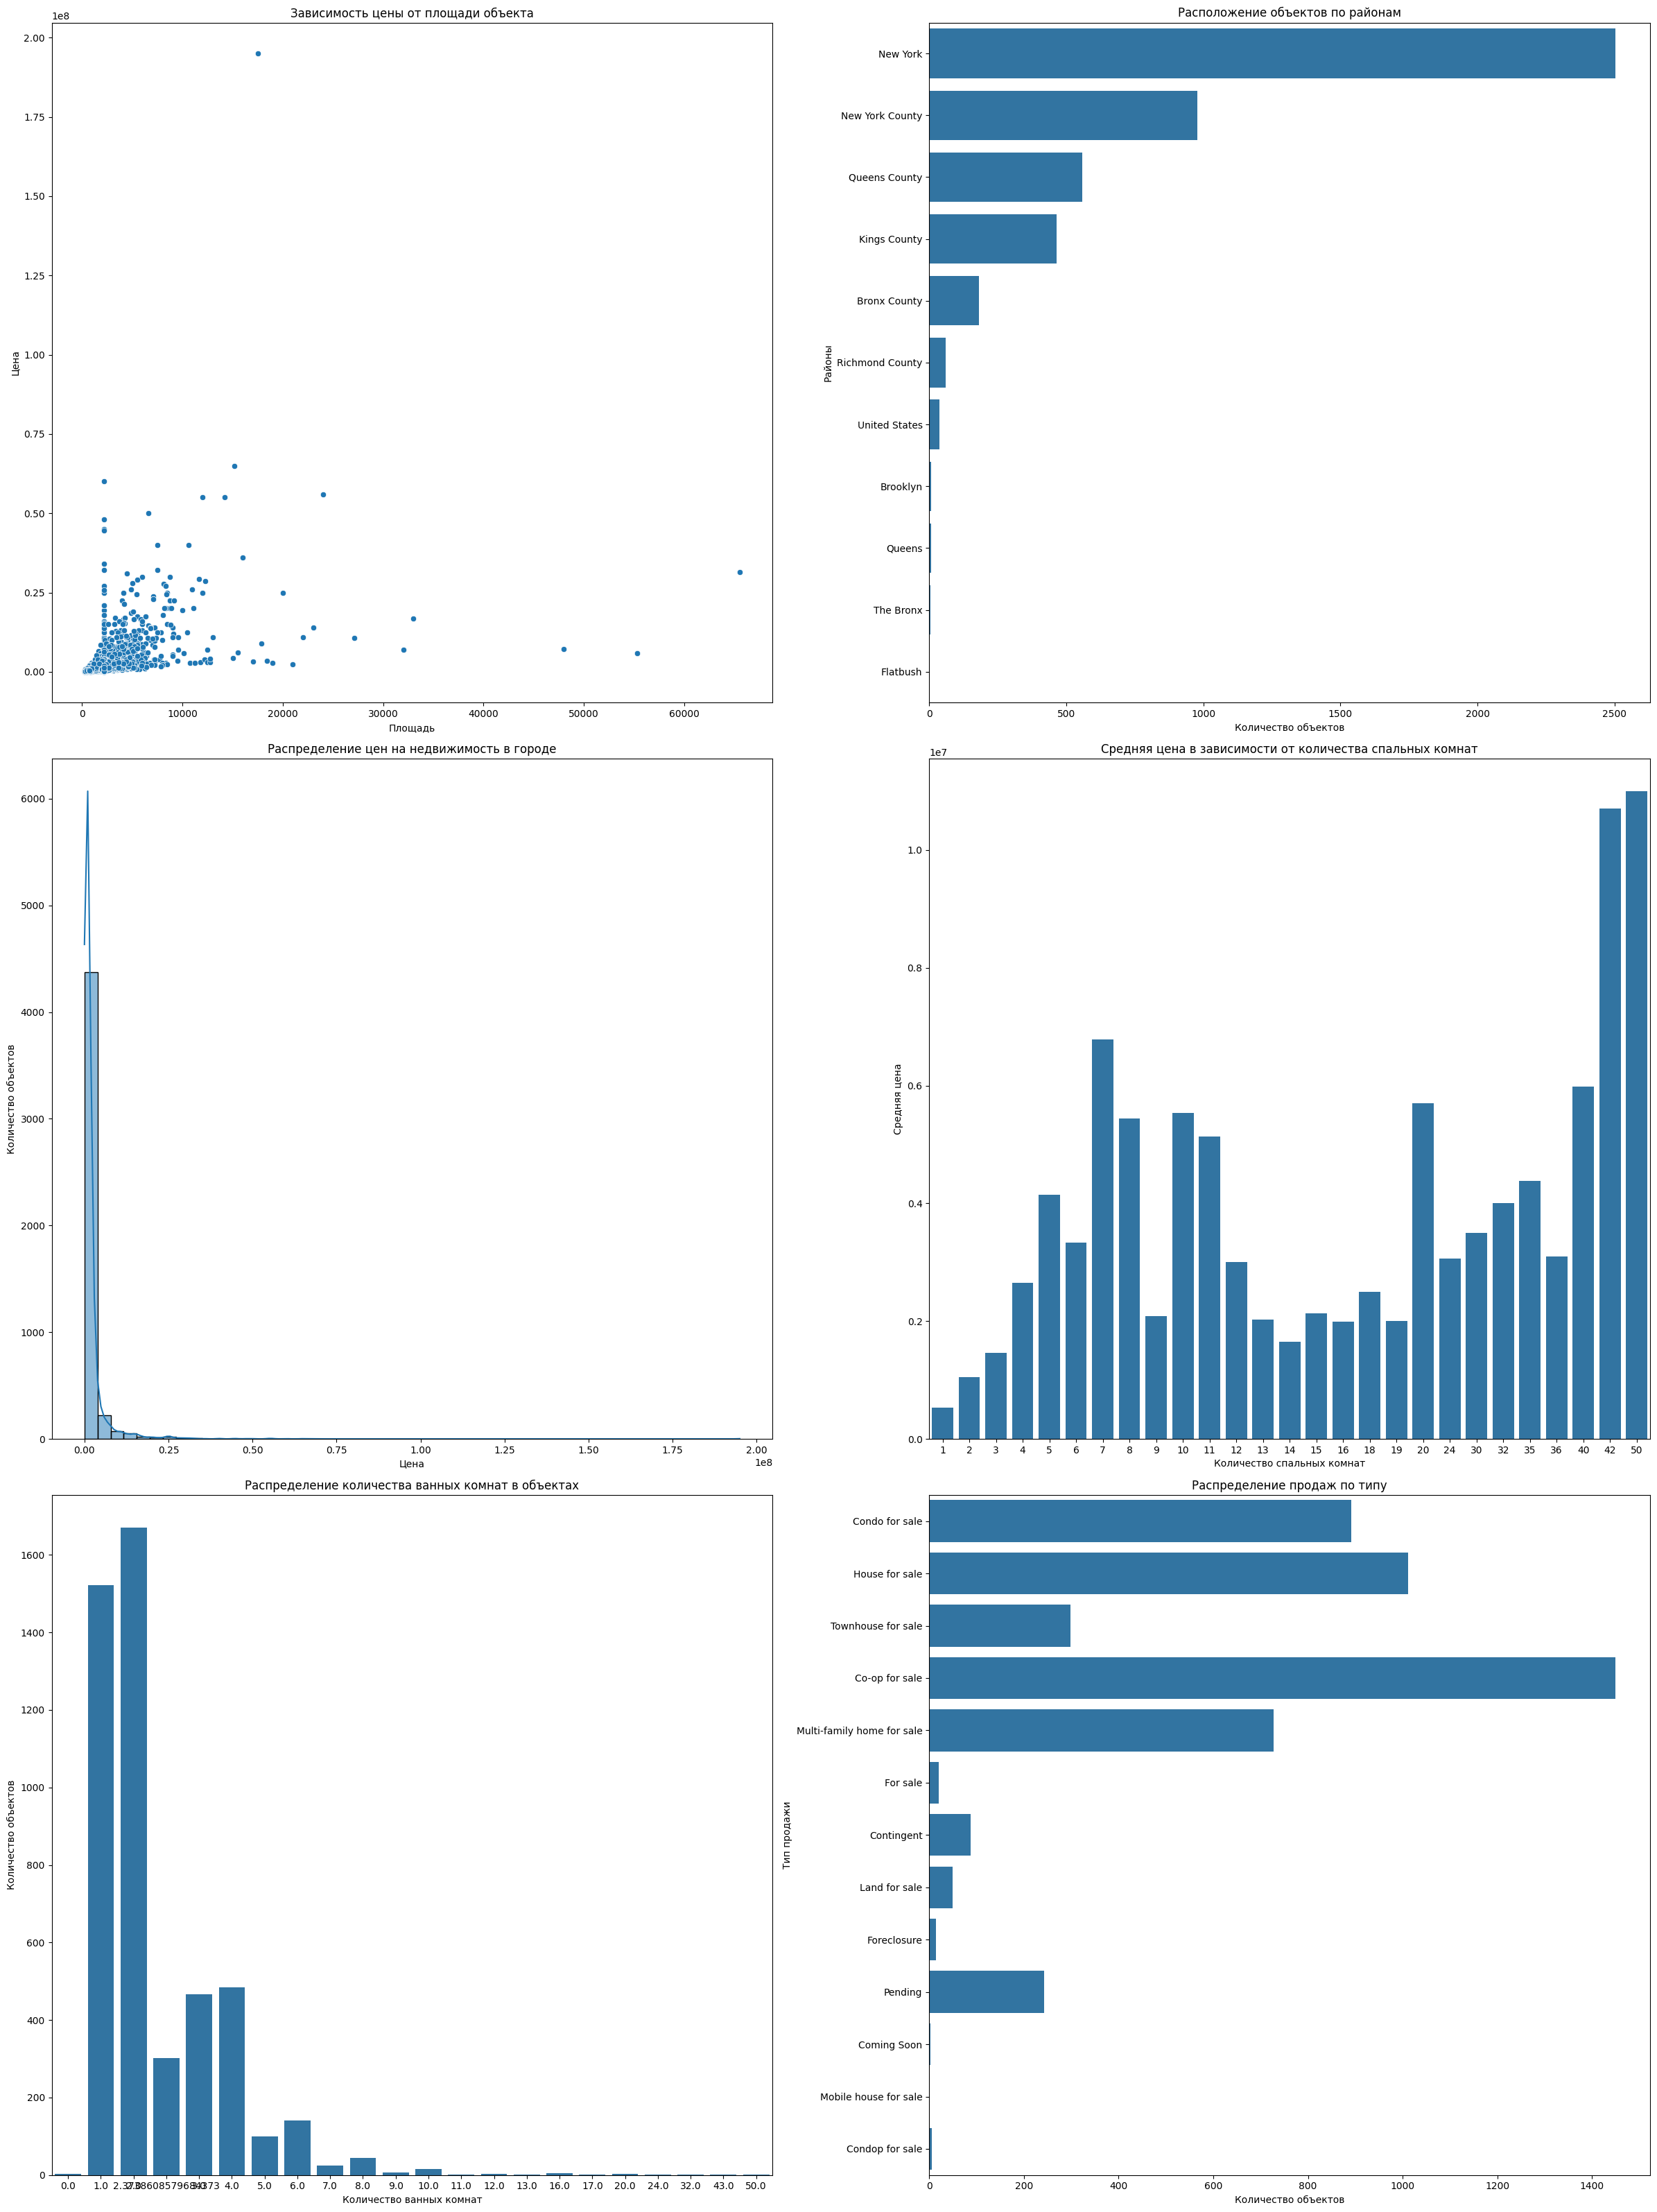

In [33]:
fig, axes = plt.subplots(3, 2, figsize=(24, 32))

#Зависимость цены от площади объекта
sns.scatterplot(x='PROPERTYSQFT', y='PRICE', data=ny_housing, ax=axes[0, 0])
axes[0, 0].set_title('Зависимость цены от площади объекта')
axes[0, 0].set_xlabel('Площадь')
axes[0, 0].set_ylabel('Цена')

#Расположение объектов по районам города
sns.countplot(y='LOCALITY', data=ny_housing, order=ny_housing['LOCALITY'].value_counts().index, ax=axes[0, 1])
axes[0, 1].set_title('Расположение объектов по районам')
axes[0, 1].set_xlabel('Количество объектов')
axes[0, 1].set_ylabel('Районы')

#Цены на объекты
sns.histplot(ny_housing['PRICE'], bins=50, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Распределение цен на недвижимость в городе')
axes[1, 0].set_xlabel('Цена')
axes[1, 0].set_ylabel('Количество объектов')

#Зависимость цен от количества комнат
price_by_beds = ny_housing.groupby('BEDS')['PRICE'].mean().reset_index()
sns.barplot(x='BEDS', y='PRICE', data=price_by_beds, ax=axes[1, 1])
axes[1, 1].set_title('Средняя цена в зависимости от количества спальных комнат')
axes[1, 1].set_xlabel('Количество спальных комнат')
axes[1, 1].set_ylabel('Средняя цена')

#Распределение количества ванных комнат
sns.countplot(x='BATH', data=ny_housing, ax=axes[2, 0])
axes[2, 0].set_title('Распределение количества ванных комнат в объектах')
axes[2, 0].set_xlabel('Количество ванных комнат')
axes[2, 0].set_ylabel('Количество объектов')

#Распределение продаж по типам и объектам недвижимости
sns.countplot(y='TYPE', data=ny_housing, ax=axes[2, 1])
axes[2, 1].set_title('Распределение продаж по типу')
axes[2, 1].set_ylabel('Тип продажи')
axes[2, 1].set_xlabel('Количество объектов')

plt.tight_layout()
plt.show()


### Идентификация выбросов

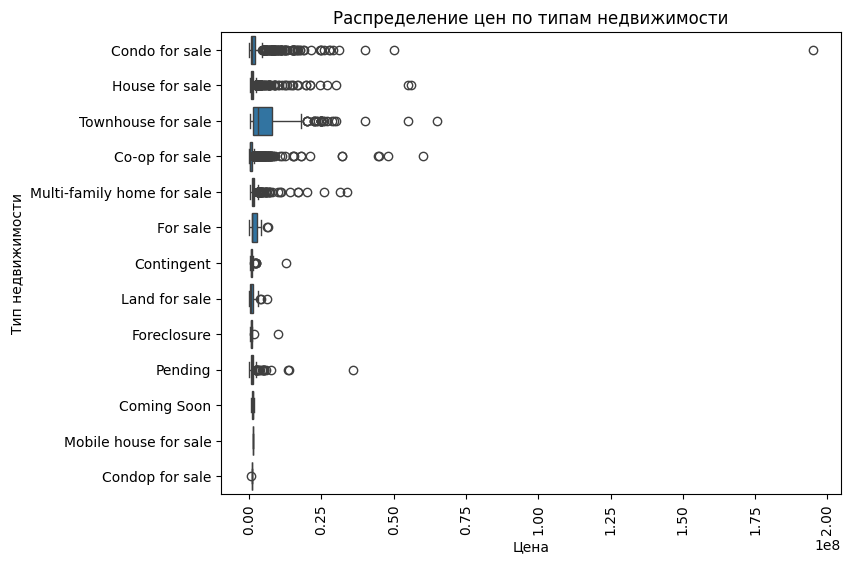

In [73]:
plt.figure(figsize=(8,6))
sns.boxplot(x='PRICE', y='TYPE', data=ny_housing)
plt.xticks(rotation=90)
plt.title('Распределение цен по типам недвижимости')
plt.ylabel('Тип недвижимости')
plt.xlabel('Цена')
plt.show()

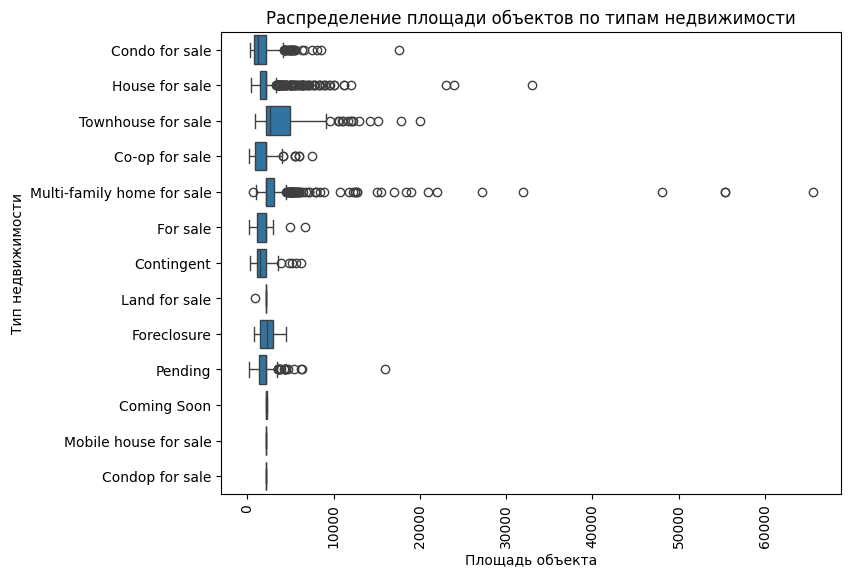

In [74]:
plt.figure(figsize=(8,6))
sns.boxplot(x='PROPERTYSQFT', y='TYPE', data=ny_housing)
plt.xticks(rotation=90)
plt.title('Распределение площади объектов по типам недвижимости')
plt.ylabel('Тип недвижимости')
plt.xlabel('Площадь объекта')
plt.show()

### Удаление выбросов
Удалите выбросы в датасете по переменной PRICE

После удаления выведите bar plot, который будет визуализировать среднюю стоимость недвижимости в зависимости от типа недвижимости.

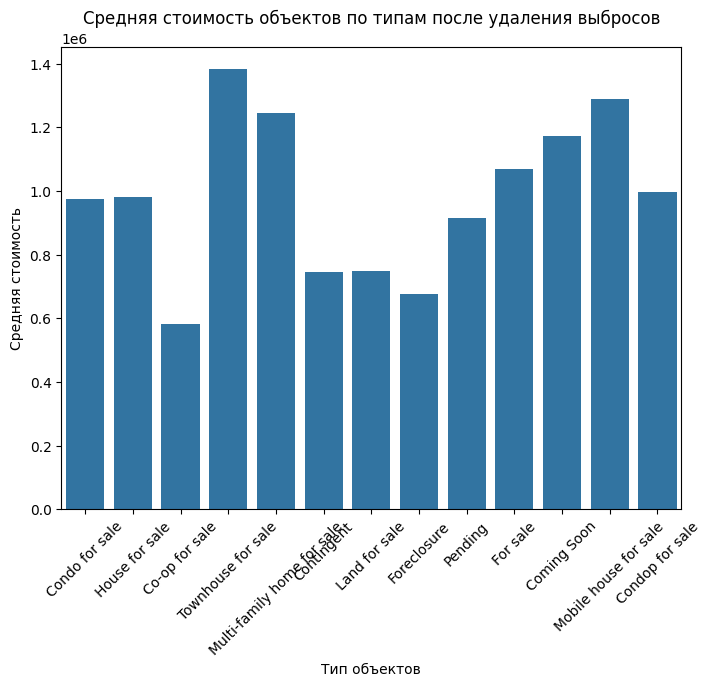

In [84]:
#Расчет iqr для PRICE
q1 = ny_housing['PRICE'].quantile(0.25)
q3 = ny_housing['PRICE'].quantile(0.75)
iqr = q3 - q1

#Определение границ выбросов
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

#Отбор данных для удаления выбросов
filter = ny_housing[(ny_housing['PRICE'] >= lower) & (ny_housing['PRICE'] <= upper)]

# Визуализация средней стоимости недвижимости по типам после удаления выбросов
plt.figure(figsize=(8, 6))
sns.barplot(x='TYPE', y='PRICE', data=filter, estimator=np.mean, errorbar=None)
plt.xticks(rotation=45)
plt.title('Средняя стоимость объектов по типам после удаления выбросов')
plt.xlabel('Тип объектов')
plt.ylabel('Средняя стоимость')
plt.show()

### Поиск выбросов с помощью правила трёх сигм
С помощью правила трех сигм найдите, какие значения являются экстремальными (выбросами) в столбце PROPERTYSQFT. Результат выведите в текстовом виде и сравните с результатом, полученным с помощью box plot в задании 2.1.

In [85]:
std = ny_housing['PROPERTYSQFT'].std()
mean = ny_housing['PROPERTYSQFT'].mean()

#Определение границ для экстремальных значений с помощью правила трех сигм
lower = mean - 3 * std
upper = mean + 3 * std

#Нахождение экстремальных значений
extreme_value = ny_housing[(ny_housing['PROPERTYSQFT'] < lower) | (ny_housing['PROPERTYSQFT'] > upper)]

#Вывод
print(f"Среднее значение | {mean}\n")
print(f"Стандартное отклонение | {std}\n")
print(f"Нижняя граница для выбросов | {lower}\n")
print(f"Верхняя граница для выбросов | {upper}\n")
print(f"Количество экстремальных значений | {extreme_value.shape[0]}\n")

Среднее значение | 2182.579571729583

Стандартное отклонение | 2374.70938068928

Нижняя граница для выбросов | -4941.5485703382565

Верхняя граница для выбросов | 9306.707713797423

Количество экстремальных значений | 46



### Выделение выбросов
Мы нашли значение, после которого все наши наблюдения можно назвать выбросами.

Подсветите их. Для этого создайте scatter plot (столбцы PROPERTYSQFT и PRICE) в котором все точки выше этого значения PROPERTYSQFT будут помечены красным цветом.

После этого удалите эти значения из датасета (сортировка по переменной PROPERTYSQFT).

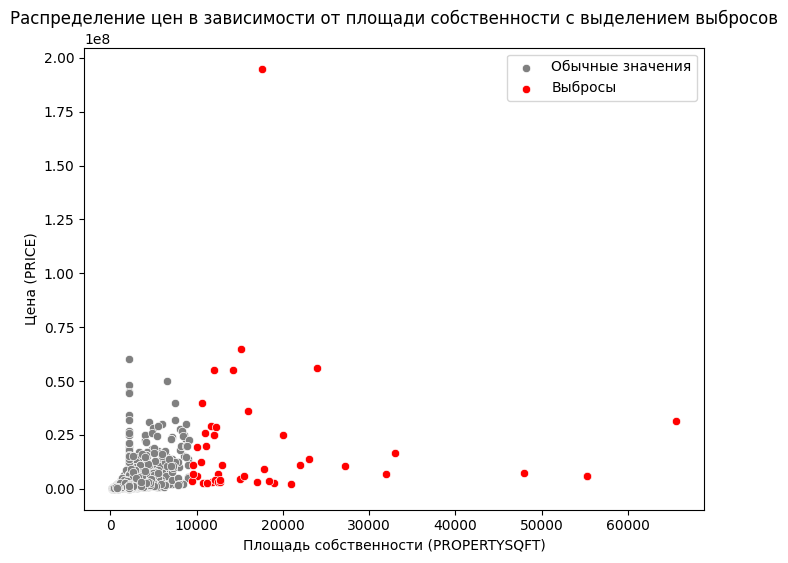

In [90]:
upper = mean + 3 * std
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PROPERTYSQFT', y='PRICE', data=ny_housing[ny_housing['PROPERTYSQFT'] <= upper], color='gray', label='Обычные значения')
sns.scatterplot(x='PROPERTYSQFT', y='PRICE', data=ny_housing[ny_housing['PROPERTYSQFT'] > upper], color='red', label='Выбросы')
plt.title('Распределение цен в зависимости от площади собственности с выделением выбросов')
plt.xlabel('Площадь собственности (PROPERTYSQFT)')
plt.ylabel('Цена (PRICE)')
plt.legend()
plt.show()

#Удаление выбросов
ny_housing_filtered = ny_housing[ny_housing['PROPERTYSQFT'] <= upper]